# Multi-layer Perceptron

The MLP is a fundamental stepping stone to more complex architectures.

In this workshop we'll look at `sklearn`'s implementation of the MLP.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

In [2]:
h = 0.025
colours = np.array(["r", "b", "g", "k", "c", "m"])
def plot_decision(ax, clf, X):
    cmap = ListedColormap(colours[:len(np.unique(y))])
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    if type(clf) is Sigmoid:
        Z = np.array([clf.predict(x) for x in np.c_[xx.ravel(), yy.ravel()]])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
def plot_points(ax, X, y):
    ax.plot
    ax.scatter(X[:, 0], X[:, 1], c=colours[y])

We'll use the moons dataset for this, because it is a perfect example of a nonlinear decision bounary.

As usual, we'll scale the data so that all features are centred around 0 and have a standard deviation of 1.

It would eventually converge without this scaling, but it would take a long time.

In [3]:
X, y = datasets.make_moons(noise=0, random_state=42)
X_std = np.copy(X)
X_std = StandardScaler().fit_transform(X_std)

First, let's use our implementation of a Simoid (or Tanh or SGD or whatever) Perceptron to plot the best linear fit.

In [4]:
class Sigmoid:
    def __init__(self, itr=50, eta=0.1) -> None:
        self.n_iterations = itr
        self.eta = eta

    def fit(self, X, y) -> None:
        self.w_ = np.zeros(X.shape[1] + 1)              # Add one for bias input (threshold)
        self.errors_ = np.zeros(self.n_iterations)      # Array for holding errors

        for i in range(self.n_iterations):              # Foreach iteration
            X, y = self._shuffle(X, y)                  # Randomise the data on each iteration
            for (x_i, y_i) in zip(X, y):                # Foreach training instance
                cost = self._update_weights(x_i, y_i)   # Update weights
                self.errors_[i] += cost                 # Add cost
            self.errors_[i] /= len(y)                   # Average cost per iteration

    def _update_weights(self, x_i, y_i):
        phi_z = self.activation(x_i)                    # Output of activation function
        error = (y_i - phi_z)
        cost = error ** 2 / 2                           # Cost is still MSE
        update = error * phi_z * (1 - phi_z )           # New update function for sigmoid

        # Update the weights. This is just linear gradient descent.
        self.w_[1:] += self.eta * x_i.T.dot(update)
        self.w_[0] += self.eta * update
        return cost

    def partial_fit(self, X, y):
        X, y = self._shuffle(X, y)
        for (x_i, y_i) in zip(X, y):  # Foreach training instance
            self._update_weights(x_i, y_i)

    def activation(self, X):
        net_exp = self.net_input(X)
        return self._sigmoid(net_exp)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def net_input(self, X):
        return np.dot(self.w_[1:].T, X) + self.w_[0]    # Sum of weighted inputs

    def predict(self, X):
        if self.activation(X) >= 0.5:                   # Quantiser changed for sigmoid
            return 1.0
        else:
            return 0

    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]

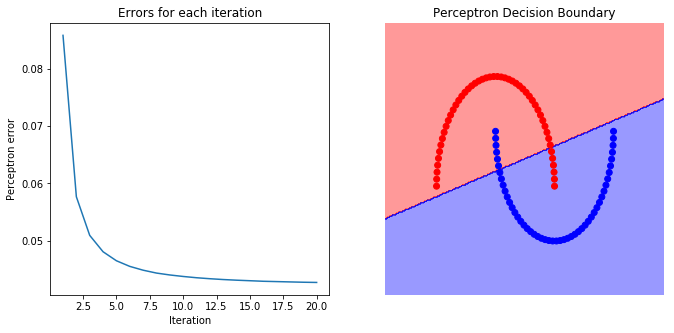

In [5]:
fig, axarr = plt.subplots(1, 2, figsize=(11, 5))
clf = Sigmoid(eta=0.1, itr=20)
clf.fit(X_std, y)
ax = axarr[0]
ax.plot(range(1, len(clf.errors_) + 1), clf.errors_)
ax.set_title("Errors for each iteration")
ax.set_xlabel("Iteration")
ax.set_ylabel("Perceptron error")

ax = axarr[1]
plot_decision(ax, clf, X_std)
plot_points(ax, X_std, y)
ax.set_axis_off()
ax.set_title("Perceptron Decision Boundary")
plt.show()

Now, let's create a three layer (so called because the input, hidden and output layers form three distinct layers) MLP.

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


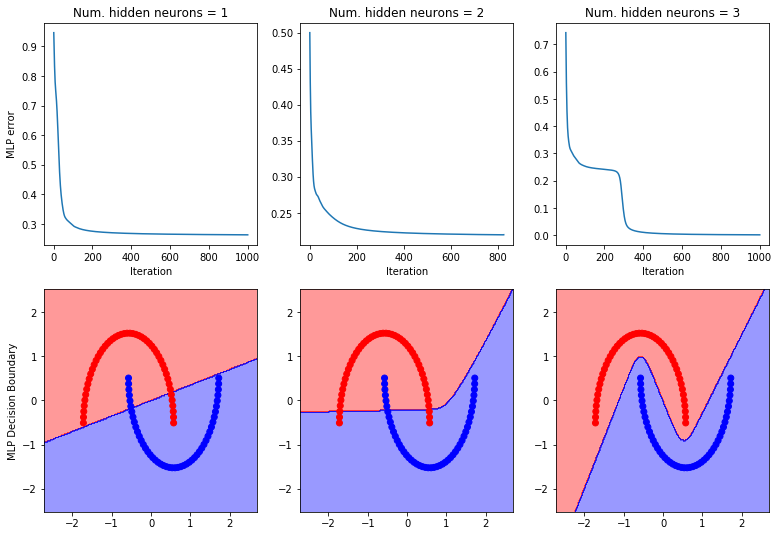

In [6]:
fig, axarr = plt.subplots(2, 3, figsize=(13, 9))
p_count = 0
for n_hidden in range(1, 3 + 1):
    ax = axarr[0, p_count]
    clf = MLPClassifier(
        hidden_layer_sizes=n_hidden, activation='tanh', learning_rate_init=0.05, 
        max_iter=1000, shuffle=True, random_state=42, tol=0
    )
    clf.fit(X_std, y)
    ax.plot(range(1, len(clf.loss_curve_) + 1), clf.loss_curve_)
    ax.set_title("Num. hidden neurons = %d" % n_hidden)
    ax.set_xlabel("Iteration")
    if p_count is 0:
        ax.set_ylabel("MLP error")
    
    ax = axarr[1, p_count]
    plot_decision(ax, clf, X_std)
    plot_points(ax, X_std, y)
#     ax.set_axis_off()
    if p_count is 0:
        ax.set_ylabel("MLP Decision Boundary")
    p_count += 1

plt.show()

Notice the plateau in the three neuron version.

## Tasks:

- Alter the learning rate
- Alter the number of iterations
- Alter the number of hidden neurons
- Change the activation function

What does changing these variables tell you about tuning? How stable is the result?